# Análise dos dados obtidos pelos sensores

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Adafruit_IO import Client
from datetime import datetime

## Funções

In [2]:
# Função para criar gráfico do histórico dos dados

def gera_historico(dataframe, campo_x:str, campo_y:str, titulo:str, texto_y:str):

    # Ordenação do dataframe
    dataframe = dataframe.sort_values(by=campo_x)

    # Criação do gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(dataframe[campo_x], dataframe[campo_y], marker='o', linestyle='', markersize=4)
    plt.title(f'Histórico: {titulo}')
    plt.xlabel('Data')
    plt.ylabel(texto_y)
    plt.grid(True)
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

In [3]:
# Função utilizada para controle do tempo de rega

def gera_historico_umidade(dataframe, campo_x: str, campo_y: str, titulo: str, 
                           texto_y: str, xy1: tuple = (0, 0), 
                           xytext1: tuple = (0, 0), msg='', shrink=0.01,
                           xy2: tuple = (0, 0), xytext2: tuple = (0, 0),
                           xy3: tuple = (0, 0), xytext3: tuple = (0, 0)):

    # Ordenação do dataframe
    dataframe = dataframe.sort_values(by=campo_x)

    # Criação do gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(dataframe[campo_x], dataframe[campo_y], marker='o', linestyle='')
    plt.title(f'Histórico: {titulo}')
    plt.xlabel('Data')
    plt.ylabel(texto_y)
    plt.grid(True)
    plt.xticks(rotation=45)

    # Indicação dos pontos de rega
    plt.annotate(msg, xy=xy1, xytext=xytext1,
                 arrowprops=dict(facecolor='red', shrink=shrink))
    
    # Indicação dos pontos de rega
    plt.annotate(msg, xy=xy2, xytext=xytext2,
                 arrowprops=dict(facecolor='red', shrink=shrink))
    
    # Indicação dos pontos de rega
    plt.annotate(msg, xy=xy3, xytext=xytext3,
                 arrowprops=dict(facecolor='red', shrink=shrink))

    plt.tight_layout()
    plt.show()

## Leitura dos dados dos sensores

In [4]:
# Atenticação
credenciais = Client('usuario', 'chave')

# Registros
registros = 2500

# Valores dos sensores
dht11_temp    = credenciais.data("pi-5.dht11-temperatura", max_results=registros)
dht11_umidade = credenciais.data("pi-5.dht11-umidade", max_results=registros)
cs12_umidade_solo = credenciais.data("pi-5.cs12-umidade", max_results=registros) 
ds18b20_temp_solo = credenciais.data("pi-5.ds18b20-temperatura", max_results=registros)
bh1750_luminosidade = credenciais.data("pi-5.bh1750-luminosidade", max_results=registros)

In [5]:
# Dataframes
df_dht11_temp = pd.DataFrame(dht11_temp)
df_dht11_umidade = pd.DataFrame(dht11_umidade)
df_cs12_umidade_solo = pd.DataFrame(cs12_umidade_solo)
df_ds18b20_temp_solo = pd.DataFrame(ds18b20_temp_solo)
df_bh1750_lux = pd.DataFrame(bh1750_luminosidade)

In [6]:
# Salvando dados originais como csv para guardar histórico

df_dht11_temp.to_csv('../dados/dh11_temp.csv', index=False)
df_dht11_umidade.to_csv('../dados/dh11_umidade.csv', index=False)
df_cs12_umidade_solo.to_csv('../dados/cs12_umidade_solo.csv', index=False)
df_ds18b20_temp_solo.to_csv('../dados/ds18b20_temp_solo.csv', index=False)
df_bh1750_lux.to_csv('../dados/bh1750_lux.csv', index=False)

In [7]:
# Leitura dos dados csv (caso não consiga conectar à API)

df_dht11_temp= pd.read_csv('../dados/dh11_temp.csv')
df_dht11_umidade= pd.read_csv('../dados/dh11_umidade.csv')
df_cs12_umidade_solo= pd.read_csv('../dados/cs12_umidade_solo.csv')
df_ds18b20_temp_solo= pd.read_csv('../dados/ds18b20_temp_solo.csv')
df_bh1750_lux= pd.read_csv('../dados/bh1750_lux.csv')

### Exemplo de tabela com os dados

In [8]:
#Exemplo DHT11
df_dht11_temp.head()

,created_epoch,created_at,updated_at,value,completed_at,feed_id,expiration,position,id,lat,lon,ele
0,1699654209,2023-11-10T22:10:09Z,NaN,26.0,NaN,2630809,2023-12-10T22:10:09Z,NaN,0FEN8DN6GHP60EC9G00SK6VDG5,NaN,NaN,NaN
1,1699653306,2023-11-10T21:55:06Z,NaN,26.0,NaN,2630809,2023-12-10T21:55:06Z,NaN,0FEN851HYJ0S197H4J6V4SZ9VV,NaN,NaN,NaN
2,1699652400,2023-11-10T21:40:00Z,NaN,26.0,NaN,2630809,2023-12-10T21:40:00Z,NaN,0FEN7WD7K546EEJH6YM6AJW109,NaN,NaN,NaN
3,1699651498,2023-11-10T21:24:58Z,NaN,26.0,NaN,2630809,2023-12-10T21:24:58Z,NaN,0FEN7KSXE8B5GN8H84TPN8ES2N,NaN,NaN,NaN
4,1699650597,2023-11-10T21:09:57Z,NaN,26.0,NaN,2630809,2023-12-10T21:09:57Z,NaN,0FEN7B6VA4XZ101MDXXT5942V8,NaN,NaN,NaN


## Organização e limpeza dos DataFrames

In [9]:
dict_df = {"dht11_temp": df_dht11_temp, 
            "dht11_umidade": df_dht11_umidade, 
            "cs12_umidade_solo": df_cs12_umidade_solo,
            "ds18b20_temp_solo": df_ds18b20_temp_solo, 
            "bh1750_lux": df_bh1750_lux}

In [10]:
# Filtro de colunas

for nome, dataframe in dict_df.items():
    dict_df[nome] = dataframe.loc[:, ["created_epoch", "created_at", "value", "id"]]

In [11]:
# Convertendo tipo de algumas colunas

for nome, dataframe in dict_df.items():
    dict_df[nome]['created_at'] = pd.to_datetime(dataframe['created_at'])
    dict_df[nome]['Data'] = dict_df[nome]['created_at'].dt.date
    dict_df[nome]['Hora'] = dict_df[nome]['created_at'].dt.time

In [12]:
# Convertendo value para inteiro

for nome, dataframe in dict_df.items():
    dict_df[nome]['value'] = pd.to_numeric(dataframe['value'], errors='coerce')\
                               .fillna(-1).astype(int)

In [13]:
# Removendo negativos

for nome, dataframe in dict_df.items():
    dict_df[nome] = dataframe[dataframe['value'] > 0]

In [14]:
# Limpeza dos dados

for nome, dataframe in dict_df.items():
    if nome == 'bh1750_lux':
        dict_df[nome] = dataframe[dataframe['value'] <= 6000]
    elif nome == 'ds18b20_temp_solo':
        dict_df[nome] = dataframe[dataframe['value'] < 80]
    else:
        dict_df[nome] = dataframe[dataframe['value'] < 110]

## Dados Históricos

### Umidade do solo

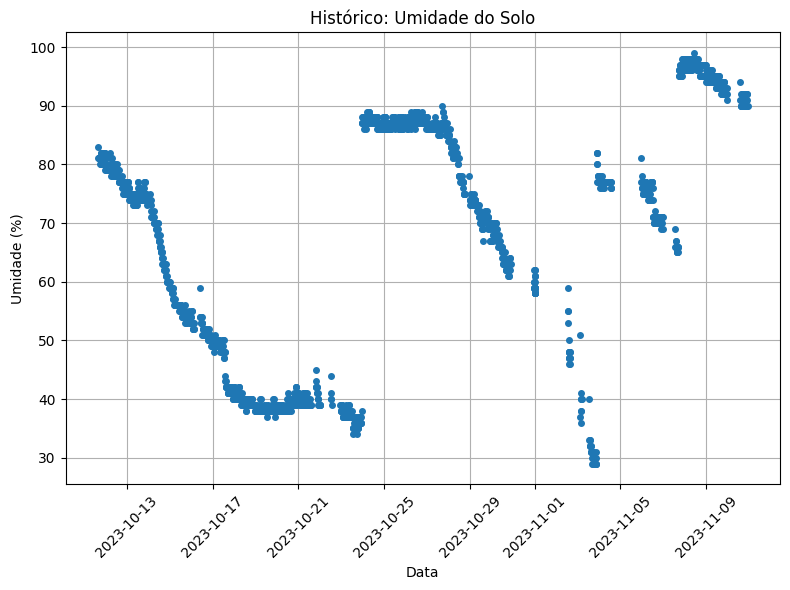

In [15]:
gera_historico(dataframe = dict_df['cs12_umidade_solo'], 
                    campo_x = 'created_at', 
                    campo_y = 'value', 
                    titulo  = 'Umidade do Solo',
                    texto_y = 'Umidade (%)')

### Temperatura ambiente

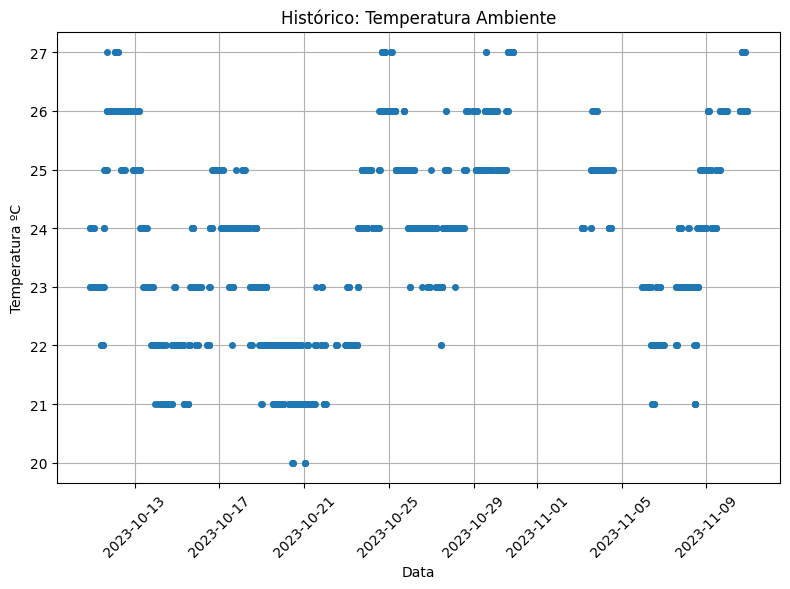

In [16]:
gera_historico(dataframe = dict_df['dht11_temp'], 
                    campo_x = 'created_at', 
                    campo_y = 'value', 
                    titulo  = 'Temperatura Ambiente', 
                    texto_y = 'Temperatura ºC')

### Umidade relativa do ar

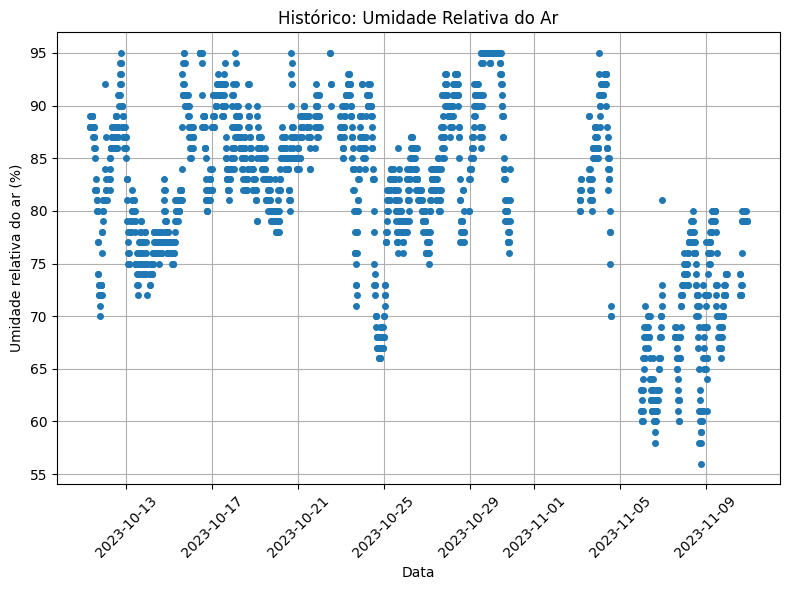

In [17]:
gera_historico(dataframe = dict_df['dht11_umidade'], 
                    campo_x = 'created_at', 
                    campo_y = 'value', 
                    titulo  = 'Umidade Relativa do Ar', 
                    texto_y = 'Umidade relativa do ar (%)')

### Temperatura do solo

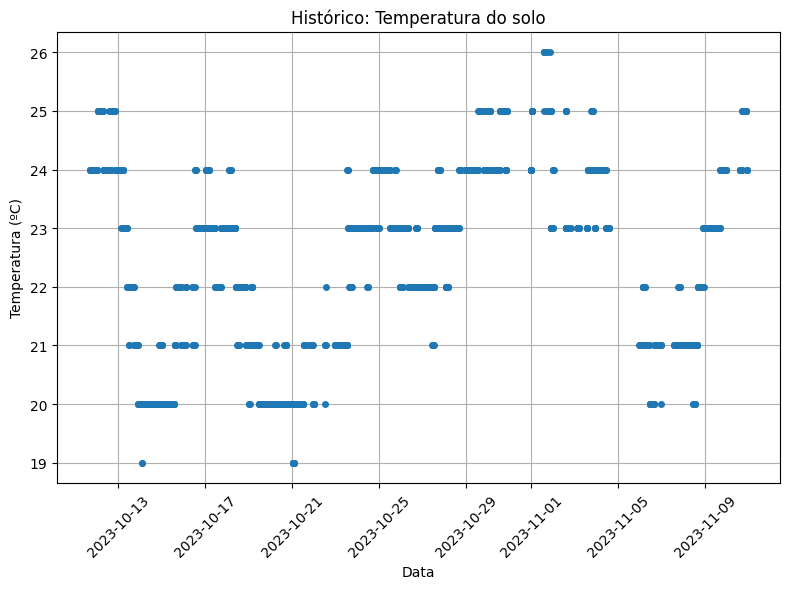

In [18]:
gera_historico(dataframe = dict_df['ds18b20_temp_solo'], 
                    campo_x = 'created_at', 
                    campo_y = 'value', 
                    titulo  = 'Temperatura do solo', 
                    texto_y = 'Temperatura (ºC)')

### Nível de luminosidade

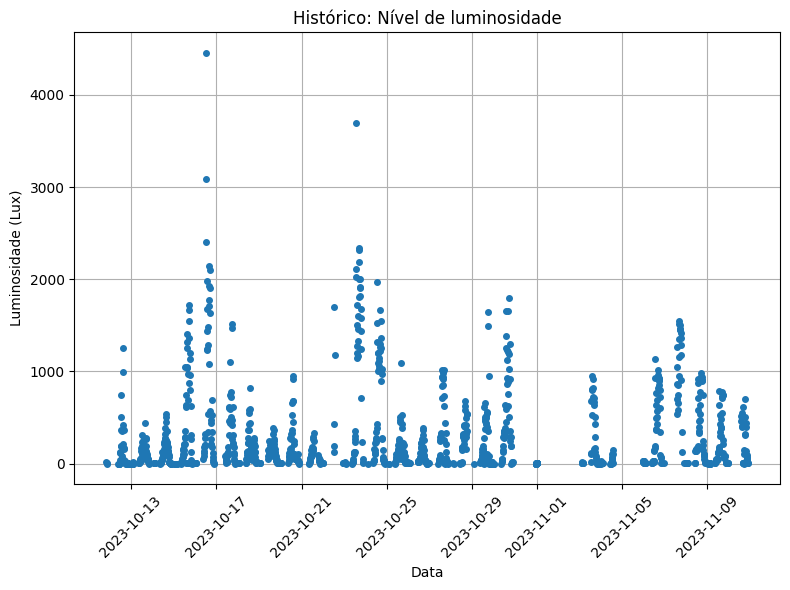

In [19]:
gera_historico(dataframe = dict_df['bh1750_lux'], 
                    campo_x = 'created_at', 
                    campo_y = 'value', 
                    titulo  = 'Nível de luminosidade', 
                    texto_y = 'Luminosidade (Lux)')

## Estudo do nível de luminosidade

### Histograma com os niveis de luminosidade

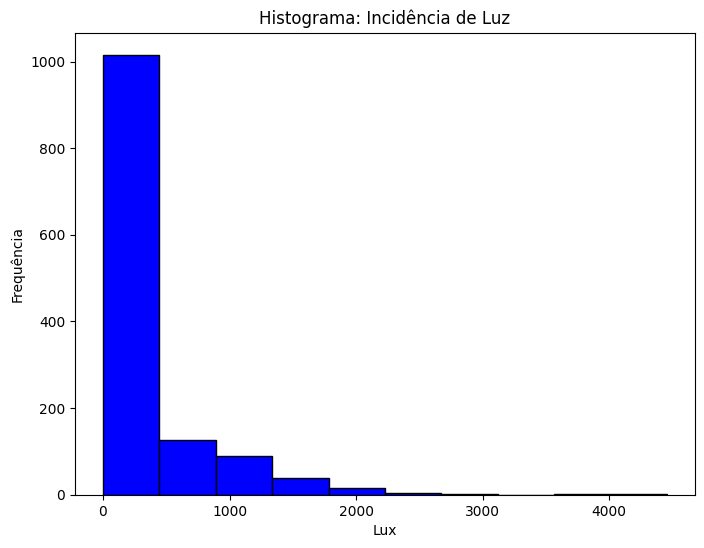

In [20]:
valores_lux = dict_df['bh1750_lux']['value']

plt.figure(figsize=(8, 6))
plt.hist(valores_lux, bins=10, color='blue', edgecolor='black')
plt.title('Histograma: Incidência de Luz')
plt.xlabel('Lux')
plt.ylabel('Frequência')
plt.show()

### Horários com maior nível de luminosidade

In [21]:
# Agrupamento e ordenação dos dados
df_bh1750_filter = dict_df['bh1750_lux'][['Data', 'Hora', 'value']].copy()
df_bh1750_filter.loc[:, 'rank'] = df_bh1750_filter.groupby('Data')['value'].rank(ascending=False, method='first')
df_bh1750_filter = df_bh1750_filter.sort_values(['Data', 'rank'], ascending=[True, True])

In [22]:
# Pegando o último registro
df_bh1750_filter = df_bh1750_filter[df_bh1750_filter['rank']==1.0]

In [23]:
# Transformação do campo Hora
df_bh1750_filter['Hora_Num'] = pd.to_datetime(df_bh1750_filter['Hora'], format='%H:%M:%S', errors='coerce').dt.hour

### Boxplot

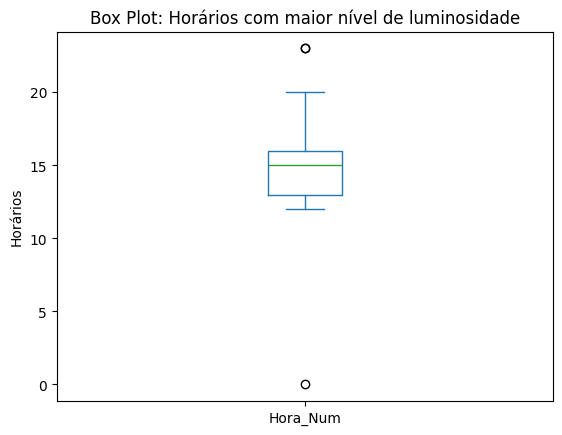

In [24]:
df_bh1750_filter['Hora_Num'].plot(kind='box')

plt.title('Box Plot: Horários com maior nível de luminosidade')
plt.ylabel('Horários')
plt.show()

## Estudo da umidade e temperatura do solo

### Tempo para o solo ficar seco após ser regado (atingir valores = 65% de umidade)

#### Análise Gráfica

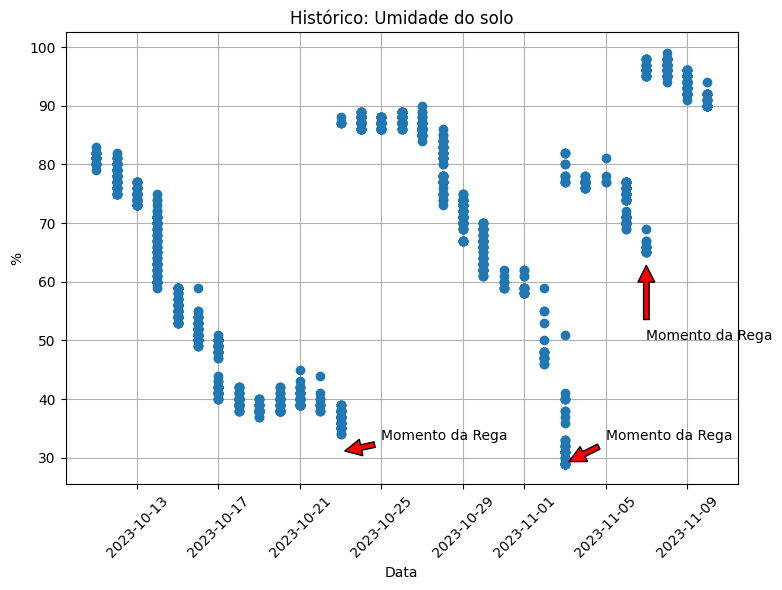

In [25]:
gera_historico_umidade(dataframe=dict_df['cs12_umidade_solo'],
                      campo_x='Data', 
                      campo_y='value', 
                      titulo='Umidade do solo', 
                      texto_y='%',
                      xy1 = (datetime.strptime('2023-10-23', '%Y-%m-%d'), 31), 
                      xytext1 = (datetime.strptime('2023-10-25', '%Y-%m-%d'), 33),

                      xy2 = (datetime.strptime('2023-11-03', '%Y-%m-%d'), 29), 
                      xytext2 = (datetime.strptime('2023-11-05', '%Y-%m-%d'), 33),

                      xy3 = (datetime.strptime('2023-11-07', '%Y-%m-%d'), 64), 
                      xytext3 = (datetime.strptime('2023-11-07', '%Y-%m-%d'), 50),

                      msg='Momento da Rega',
                      shrink=0.1)

In [26]:
df_umidade_filter = dict_df['cs12_umidade_solo'].sort_values(by = 'created_at')

In [27]:
df_umidade_filter = df_umidade_filter\
                         .loc[(df_umidade_filter['value'] > 80) \
                            & (df_umidade_filter['value'].shift(1) < 70)]

df_umidade_filter

,created_epoch,created_at,value,id,Data,Hora
1164,1698101203,2023-10-23 22:46:43+00:00,88,0FE6SK18TJAZH361FT4BNN49V5,2023-10-23,22:46:43
431,1699046538,2023-11-03 21:22:18+00:00,82,0FEFKAENGBS886J0J2GW8J3S5B,2023-11-03,21:22:18
250,1699376351,2023-11-07 16:59:11+00:00,96,0FEJNKSRB7QEC3WGYPGVWR0ME4,2023-11-07,16:59:11


In [28]:
datas_rega = df_umidade_filter['Data'].tolist()
datas_rega

[datetime.date(2023, 10, 23),
 datetime.date(2023, 11, 3),
 datetime.date(2023, 11, 7)]

In [29]:
datas_seco = []

df_umidade_rega1 = dict_df['cs12_umidade_solo']

df_umidade_rega1 = df_umidade_rega1[(df_umidade_rega1['Data'] >= datas_rega[0]) & 
                                    (df_umidade_rega1['Data'] < datas_rega[1])  &
                                    (df_umidade_rega1['value'] == 65)]
                                    
datas_seco.append(df_umidade_rega1['Data'].min())

In [30]:
df_umidade_rega2 = dict_df['cs12_umidade_solo']

df_umidade_rega2 = df_umidade_rega2[(df_umidade_rega2['Data'] >= datas_rega[1]) & 
                                    (df_umidade_rega2['Data'] <= datas_rega[2])  &
                                    (df_umidade_rega2['value'] == 65)]

datas_seco.append(df_umidade_rega2['Data'].min())

In [31]:
# Diferença em dias
tempo_rega = {f'Data Rega': [datas_rega[0], datas_rega[1]],
              f'Tempo para atingir 65%': [datas_seco[0] - datas_rega[0], datas_seco[1] - datas_rega[1]]}

pd.DataFrame(tempo_rega)

,Data Rega,Tempo para atingir 65%
0,2023-10-23,7 days
1,2023-11-03,4 days


### Correlação: temperatura ambiente e temperatura do solo

In [32]:
ds18b20_temp_sort = dict_df['ds18b20_temp_solo'].sort_values(by='created_at')
dht11_temp_sort   = dict_df['dht11_temp'].sort_values(by='created_at')
ds18b20_temp_sort = ds18b20_temp_sort.head(len(dht11_temp_sort))

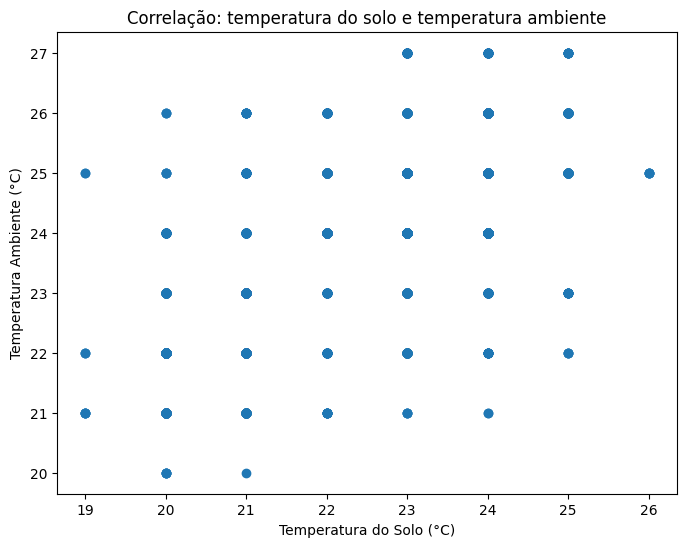

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(ds18b20_temp_sort['value'], dht11_temp_sort['value'])
plt.title('Correlação: temperatura do solo e temperatura ambiente')
plt.xlabel('Temperatura do Solo (°C)')
plt.ylabel('Temperatura Ambiente (°C)')
plt.show()

### Correlação: lumionosidade e temperatura do solo

In [34]:
bh1750_sort   = dict_df['bh1750_lux'].sort_values(by='created_at')
ds18b20_temp_sort_nw = ds18b20_temp_sort.head(len(dict_df['bh1750_lux']))

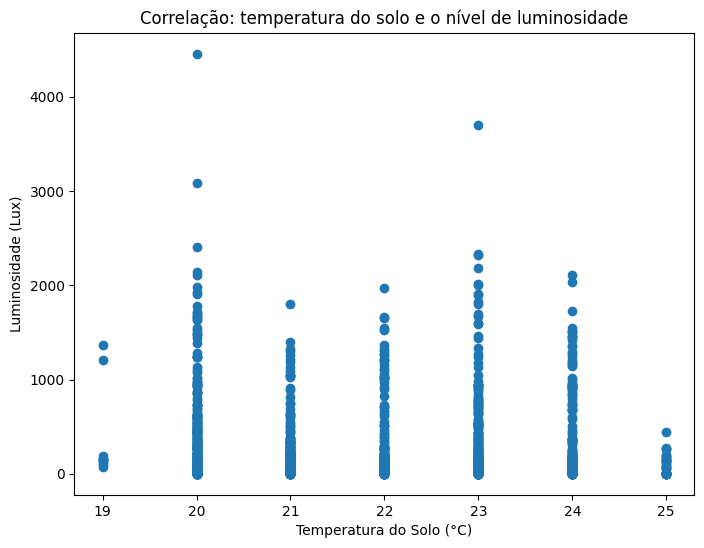

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(ds18b20_temp_sort_nw['value'], bh1750_sort['value'])
plt.title('Correlação: temperatura do solo e o nível de luminosidade')
plt.xlabel('Temperatura do Solo (°C)')
plt.ylabel('Luminosidade (Lux)')
plt.show()